# Probability of evolutionary rescue

Code to generate Figure 1 showing the effect of different parameters on the probability of rescue from new mutations, $P_\mathrm{new}(\mathcal R)$.

Illustrated for the case of Figure 1D with parameters: $W_0=10^4, B_0=0, r = 0.09, s = 0.1,$ and a range of values of $u$.

* `p`: exact probabilities

* `p2`: approximate probabilities

In [1]:
run rescue_theory

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()
sns.set_style('ticks')
sns.set_context('poster')

In [4]:
W0 = 10000
r = 0.09
s = 0.1
logu = np.arange(-3, -5.01, -.02)
p = []
p2 = []
for i in range(len(logu)):
    print('.', end=' ')
    exact = prob_rescue(W0, 0, r, s, 10**logu[i], 100)
    approx = approx_prob_rescue_new(W0, r, s, 10**logu[i])
    p.append(exact)
    p2.append(approx)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

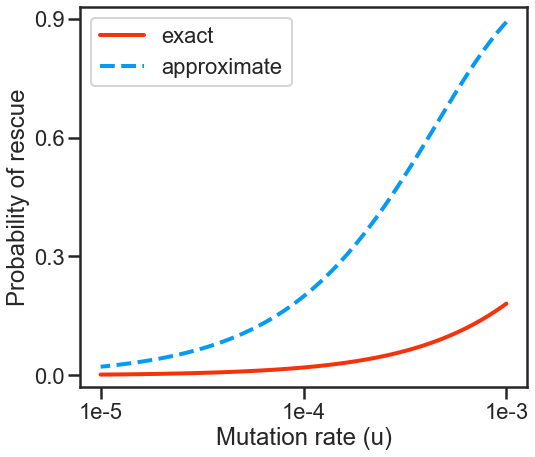

In [5]:
fig = plt.figure(figsize=(8, 7))
plt.ylim(-.03, .93)
plt.yticks([0, .3, .6, .9])
plt.plot(logu, p, color=sns.xkcd_rgb['vermillion'], label='exact', lw=4)
plt.plot(logu, p2, '--', color=sns.xkcd_rgb['azure'], label='approximate', lw=4)
plt.ylabel('Probability of rescue')
plt.xlabel('Mutation rate (u)')
plt.xticks([-5, -4, -3], ['1e-5', '1e-4', '1e-3'])
plt.legend();

## Calculations at the end of section 2

Using the parameters of Figure 1D and $u=10^{-3}$.

### Exact probability of rescue

In [6]:
W0 = 1e4
r = 0.09
s = 0.1
u = 1e-3
prob_rescue(W0, 0, r, s, u, 100)

0.1811967005526014

### Approximate probability of rescue

In [7]:
approx_prob_rescue_new(W0, r, s, u)

0.8916319767781044

### Improved approximation

If we approximate the probability of fixation as $p_b = 2(s-r-rs)$, replace it in Equation 12, solve for $q_w$ and use the full result without further approximations we get

$$ p_w \approx \frac{2u(1 - r) (s - r - r s)}{r + u - ru}$$ 

and the probability of rescue is given by

$$ P_\text{new}(\mathcal R) \approx 1 - \exp(-p_w W_0)$$

In [8]:
pw = 2 * u * (1 - r) * (s - r - r * s) / (r + u - r * u)
1 - exp(-pw * W0)

0.1814313379426784